## Homework

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').  

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using wget link mentioned below:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

```

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.


## Loading the data

Use only the following columns:  
* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`  

* Fill NAs with 0.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer` to turn the dataframe into matrices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/housing_data_week_3.csv')

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df['median_house_value'] 

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [7]:
df['median_house_value'] = np.log1p(df.median_house_value.values).astype('float') 

In [8]:
(df['median_house_value'])

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, )

In [11]:
len (df), len(df_train), len(df_val), len(df_test)

(20640, 12384, 4128, 4128)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [15]:
from sklearn.feature_extraction import DictVectorizer

In [16]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [17]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [19]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [20]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import math
import sklearn.metrics as metrics

In [25]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

mse = metrics.mean_squared_error(y_val,y_pred, squared=False)

print ("RMSE: ", round((mse),2))


RMSE:  0.25


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 55
- 75
- 150

In [48]:
scores = []

for n in range(10, 210, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)

    rmse = metrics.mean_squared_error(y_val,y_pred, squared=False)
    
    scores.append((n, rmse))

In [49]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

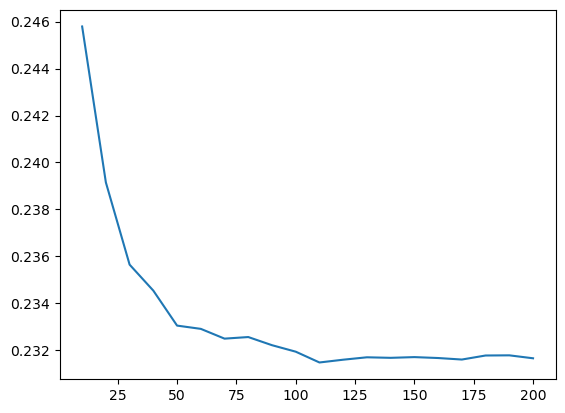

In [50]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [51]:
df_scores.sort_values(by='rmse').head()

,n_estimators,rmse
10,110,0.231484
11,120,0.231602
16,170,0.231609
19,200,0.231663
15,160,0.231673


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25

In [30]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 210, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, max_depth=d)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        rmse = metrics.mean_squared_error(y_val,y_pred)

        scores.append((d, n, rmse))

In [31]:
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

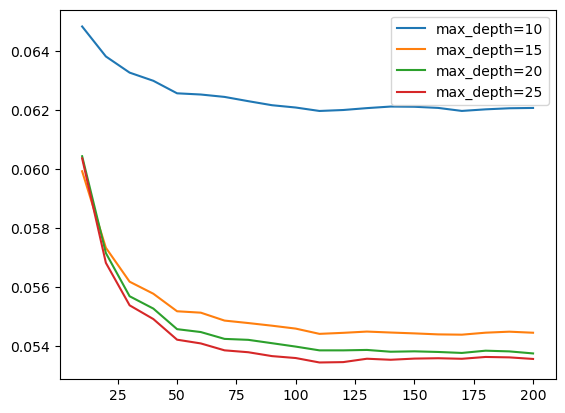

In [32]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse,
             label='max_depth=%d' % d)

plt.legend()

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

In [33]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=20, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Feature Importance')

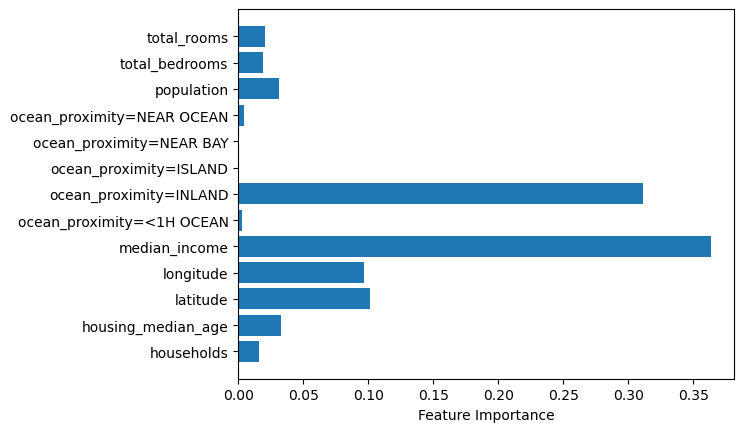

In [35]:
features = dv.get_feature_names()
plt.barh(features, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [36]:
f_dic = list(zip(rf.feature_importances_,features))
sorted(f_dic, reverse=True)

[(0.3632241761204236, 'median_income'),
 (0.3109008417080607, 'ocean_proximity=INLAND'),
 (0.10133335065432272, 'latitude'),
 (0.09634054882440193, 'longitude'),
 (0.03319673864709362, 'housing_median_age'),
 (0.030998886851355538, 'population'),
 (0.020465081805406238, 'total_rooms'),
 (0.019372602815159373, 'total_bedrooms'),
 (0.016140755771256902, 'households'),
 (0.004452192019837238, 'ocean_proximity=NEAR OCEAN'),
 (0.0027652480009874086, 'ocean_proximity=<1H OCEAN'),
 (0.00045277051874698695, 'ocean_proximity=NEAR BAY'),
 (0.0003568062629475935, 'ocean_proximity=ISLAND')]

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

In [37]:
import xgboost as xgb

In [38]:
for i, f in enumerate(features):
    features[i] = f.lower().replace('<','less ')
    
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [39]:
scores = []

for n in [0.3, 0.1, 0.01]:
    xgb_params = {
        'eta': n, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100)

    y_pred = model.predict(dval)

    mse = metrics.mean_squared_error(y_val,y_pred)
    rmse = round(math.sqrt(mse),2)
    
    scores.append((n, rmse))

In [40]:
scores

[(0.3, 0.23), (0.1, 0.23), (0.01, 4.26)]

In [41]:
sorted(scores, reverse=True)

[(0.3, 0.23), (0.1, 0.23), (0.01, 4.26)]

## Submit the results

* Submit your results here: https://forms.gle/3yMSuQ4BeNuZFHTU8
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 17 October (Monday), 23:00 CEST.

After that, the form will be closed.